In [1]:
import sqlite3
connection =  sqlite3.connect("/Volumes/Seagate Backup Plus Drive/DFA/dfa_ml_2.sqlite")
# connection =  sqlite3.connect("/Volumes/AYV WORK/datset DFA/dfa_ml_1.sqlite")

cur = connection.cursor()

OperationalError: unable to open database file

In [2]:
##### DO NOT RUN
### to close connection 
### 
connection.close()

In [69]:
# from sqlite3 import Error
# def sql_connection():
#     try:
#         con = sqlite3.connect('dfa_ml_3.sqlite')
#         print("Connection is established")
#     except Error:
#         print(Error)
#     finally:
#         con.close()
        
# sql_connection()

In [61]:
# import sqlite3
# connection =  sqlite3.connect("dfa_ml_4.sqlite")

# cur = connection.cursor()

In [70]:
# select * from dfa_ml_data_records limit 10

In [13]:
import pandas as pd
df = pd.read_sql_query("SELECT count(*) from dfa_ml_data_records where classification_code=='13210'and position_code =='0'", connection)

# Verify that result of SQL query is stored in the dataframe
print(df.head())

# connection.close()

   count(*)
0         0


In [62]:
limit=10
clause = ""
file_name = "main"
sql_fetch_blob_query = "SELECT id, monitor_id, waveform_id, file_name, classification_code, position_code, phase_code, ground_code, powerline_frequency, duration_seconds, rms_data FROM dfa_ml_data_records, " + \
                           "(select max(waveform_id) as wav, max(monitor_id) as mon  FROM dfa_ml_data_records " + \
                           "where monitor_id  NOT IN (110003001002, 100001001001, 100002001001, 100002002001, 100002002002, 101001001001, 101002001001, 101002001002, 101002001003, 110002001002) and " + \
                           "monitor_id > 100000000000  and " + \
                           "monitor_id NOT IN (110001001001) and " + \
                           "duration_seconds >9 and duration_seconds < 30 " + \
                           "group by waveform_id, monitor_id " + \
                           "having count(waveform_id) = 1 " +\
                            clause + ") as der " + \
                           "where waveform_id = wav and monitor_id = mon and classification_code =='10110' limit " +\
                            str(limit)

In [13]:
limit=100
clause = ""
sql_fetch_blob_query = """SELECT id, monitor_id, waveform_id, file_name, classification_code, position_code, phase_code, ground_code, powerline_frequency, duration_seconds, rms_data  
                                from """ + file_name + """.dfa_ml_data_records,
                                (select  max(waveform_id) as wav, max(monitor_id) as mon from
                                (select waveform_id, monitor_id, classification_code, position_code FROM dfa_ml_data_records where monitor_id  NOT IN (110003001002, 100001001001, 100002001001, 100002002001, 100002002002, 101001001001, 101002001001, 101002001002, 101002001003, 110002001002) and monitor_id > 100000000000 and monitor_id NOT IN (110001001001) and duration_seconds >9 and duration_seconds < 30)
                                group  by waveform_id, monitor_id
                                having count(waveform_id) = 1 """ + \
                                clause + ") as der " + \
                                "where waveform_id = wav and monitor_id = mon and classification_code in ('23100','23104','23102','10110','10120','20110','20210','20211','20130','20310','20140','20510','20520','23180','28110','30200','30100','15110','20410','15220','15710','13170','13171','13120','13121','12110','23190','13210','13220','13110','13310','23310') and position_code == "+ \
                                str(2) + \
                                " limit " +\
                                str(limit)


In [10]:
# sql_fetch_blob_query

In [63]:
records=cur.execute(sql_fetch_blob_query)

In [65]:
t= records.fetchall()
print(t)
# len(records)

[(1500013, 103002001001, 1562873335, 'DFA103002001001_20190711_142855.pqd', 10110, 1, 6, 1, 60, 10, b'\xc8\xd1\xe9E+\xd3\xe9EO\xd3\xe9E\x7f\xd3\xe9EB\xd3\xe9E+\xd2\xe9E\xac\xd3\xe9E\xae\xd2\xe9E\xd5\xd2\xe9E\x9b\xd2\xe9E\xbf\xd2\xe9En\xd1\xe9E7\xd2\xe9E\x8c\xd0\xe9E\xca\xcf\xe9Ei\xcf\xe9E\xbd\xd0\xe9E\xee\xcf\xe9E\xfe\xd0\xe9E\xc3\xcf\xe9E\xec\xcf\xe9E\xc6\xcf\xe9E,\xce\xe9E\xd7\xcb\xe9E\x1d\xca\xe9E\xeb\xc8\xe9E\xa6\xc6\xe9E\xf1\xc5\xe9E\xf1\xc5\xe9E\x11\xc7\xe9ES\xca\xe9E\x86\xcc\xe9Eh\xce\xe9E\x89\xd0\xe9E\x8b\xd3\xe9E~\xd4\xe9E\xd6\xd6\xe9E\xd0\xd7\xe9E1\xd8\xe9E1\xd8\xe9E\x8f\xd8\xe9El\xd8\xe9Es\xd7\xe9E\x8d\xd6\xe9E\x02\xd7\xe9E3\xd8\xe9E\x1f\xd6\xe9E\x0e\xd5\xe9E\xca\xd3\xe9E,\xd3\xe9EC\xd2\xe9E\x9e\xd3\xe9Ee\xd3\xe9E\x8c\xd4\xe9E\xa3\xd6\xe9E+\xd8\xe9E\x9b\xd8\xe9E\xc0\xd9\xe9E\x93\xd9\xe9E\xd6\xdb\xe9E\xf9\xdb\xe9Ey\xdc\xe9EO\xdb\xe9Eb\xda\xe9E\x96\xd8\xe9E)\xd9\xe9E&\xda\xe9E\xb0\xdb\xe9E\xbd\xdc\xe9E\xdc\xdd\xe9E5\xdf\xe9EI\xe0\xe9E\x11\xe0\xe9E9\xe3\xe9EL\xe3\xe9E\xab\xe3\x

In [66]:
records

## Post call work 


In [68]:
import pandas as pd
import sqlite3

connection =  sqlite3.connect("dfa_ml_4.sqlite")
cur = connection.cursor()
df = pd.read_sql_query("SELECT * from dfa_ml_data_records limit 20", connection)
print(df.head(10))

        id  waveform_id    monitor_id                            file_name  \
0  1500001   1562968043  108005001002  DFA108005001002_20190712_164723.pqd   
1  1500002   1562972254  112001001004  DFA112001001004_20190713_082734.pqd   
2  1500003   1563048729  113004001003  DFA113004001003_20190713_151209.pqd   
3  1500004   1562872591  104003001001  DFA104003001001_20190711_141631.pqd   
4  1500005   1562872960  101004001003  DFA101004001003_20190711_142240.pqd   
5  1500006   1562968043  108008003002  DFA108008003002_20190712_164723.pqd   
6  1500007   1563048797  113003001001  DFA113003001001_20190713_151317.pqd   
7  1500008   1562972603  116001001002  DFA116001001002_20190712_180323.pqd   
8  1500009   1562873181  121001001001  DFA121001001001_20190711_142621.pqd   
9  1500010   1562972761  108005002001  DFA108005002001_20190712_180601.pqd   

   classification_code  position_code  phase_code  ground_code  \
0                15110              1           0            0   
1        

In [ ]:
limit=1000
clause = ""
sql_fetch_blob_query = "SELECT id, monitor_id, waveform_id, file_name, classification_code, position_code, phase_code, ground_code, powerline_frequency, duration_seconds, rms_data FROM dfa_ml_data_records, " + \
                           "(select max(waveform_id) as wav, max(monitor_id) as mon  FROM dfa_ml_data_records " + \
                           "where monitor_id  NOT IN (110003001002, 100001001001, 100002001001, 100002002001, 100002002002, 101001001001, 101002001001, 101002001002, 101002001003, 110002001002) and " + \
                           "monitor_id > 100000000000  and " + \
                           "monitor_id NOT IN (110001001001) and " + \
                           "duration_seconds >9 and duration_seconds < 30 " + \
                           "group by waveform_id, monitor_id " + \
                           "having count(waveform_id) = 1 " +\
                            clause + ") as der " + \
                           "where waveform_id = wav and monitor_id = mon limit " +\
                            str(limit)
records=cur.execute(sql_fetch_blob_query)


In [28]:
##poscode
limit=100
clause = ""
sql_fetch_blob_query = """SELECT id, monitor_id, waveform_id, file_name, classification_code, position_code, phase_code, ground_code, powerline_frequency, duration_seconds, rms_data  
                                from """ + file_name + """.dfa_ml_data_records,
                                (select  max(waveform_id) as wav, max(monitor_id) as mon from
                                (select waveform_id, monitor_id, classification_code, position_code FROM dfa_ml_data_records where monitor_id  NOT IN (110003001002, 100001001001, 100002001001, 100002002001, 100002002002, 101001001001, 101002001001, 101002001002, 101002001003, 110002001002) and monitor_id > 100000000000 and monitor_id NOT IN (110001001001) and duration_seconds >9 and duration_seconds < 30)
                                group  by waveform_id, monitor_id
                                having count(waveform_id) = 1 """ + \
                                clause + ") as der " + \
                                "where waveform_id = wav and monitor_id = mon and classification_code in ('23100','23104','23102','10110','10120','20110','20210','20211','20130','20310','20140','20510','20520','23180','28110','30200','30100','15110','20410','15220','15710','13170','13171','13120','13121','12110','23190','13210','13220','13110','13310','23310') and position_code == "+ \
                                str(6) + \
                                " limit " +\
                                str(limit)

records=cur.execute(sql_fetch_blob_query)

In [29]:
rcd = records.fetchall()

In [30]:
len(rcd)

0

In [51]:
rcd[0]

(1500005,
 101004001003,
 1562872960,
 'DFA101004001003_20190711_142240.pqd',
 0,
 5,
 7,
 3,
 50,
 10,
 b'\xd7B\xe7E\xa6A\xe7E\x9aA\xe7E\xd2@\xe7E\xc0?\xe7E\xea?\xe7E\x08>\xe7E\xb1@\xe7E\xf5?\xe7ES?\xe7E\x1eB\xe7E\xf8?\xe7E\xb6A\xe7E\x13B\xe7E\xf4A\xe7E\xe8A\xe7E\xc3@\xe7EYA\xe7E/@\xe7Eh@\xe7E\x87?\xe7EL@\xe7ElA\xe7E\xd0@\xe7E]A\xe7E\xd1@\xe7E\xb4A\xe7E\x10C\xe7E\xbaA\xe7E%B\xe7ElA\xe7E\xb3B\xe7ElB\xe7E.B\xe7E\xa6G\xe7E\x80F\xe7EzE\xe7E\x1eH\xe7E\xa1F\xe7E\x00G\xe7E6G\xe7E>F\xe7EbH\xe7E\xfbF\xe7E@H\xe7E\xe7A\xe7E\xeaC\xe7EIE\xe7E\xf2A\xe7E\x0eF\xe7E\xb6C\xe7EKD\xe7ELD\xe7E\x1cD\xe7E\xb6D\xe7EBD\xe7E\x84D\xe7E)F\xe7E\xffE\xe7E\x1aG\xe7E\x80F\xe7EjF\xe7E\xe7F\xe7E5F\xe7E\x03G\xe7E>H\xe7E\xf1H\xe7E\xa4H\xe7EdG\xe7E\x19H\xe7EhG\xe7E\x1dH\xe7E\x19H\xe7E\xfdF\xe7E\x18I\xe7E\xe8G\xe7E\x1cH\xe7E\xdbF\xe7EpF\xe7E\x82G\xe7E\xbcF\xe7EXH\xe7E\xc9F\xe7EMF\xe7EwL\xe7E\xddJ\xe7ExK\xe7E\x95K\xe7EvL\xe7EsL\xe7E\xfbK\xe7E\xf3K\xe7E\xdaI\xe7E\x8fJ\xe7E}J\xe7EEF\xe7E\xabF\xe7E\xbaF\xe7E\xc8F\xe7ElG\xe7E{

In [45]:
type(records)

sqlite3.Cursor

In [48]:
# rcdone = records.fetchone()
# len(rcdone)

11

In [10]:
import numpy as np
import shutil
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import time
from enum import IntEnum


In [11]:
class Indx(IntEnum):
    ID = 0
    MONITOR = 1
    RECORD = 2
    FILE = 3
    CLASS = 4
    POSITION = 5
    PHASE = 6
    GROUND = 7
    FREQ = 8
    SECONDS = 9
    BLOB = 10

In [12]:
class SIndx(IntEnum):
    ID = 0
    NAME = 1
    PT_S_A = 2
    PT_S_B = 3
    PT_S_C = 4
    PT_P_A = 5
    PT_P_B = 6
    PT_P_C = 7
    CT_S_A = 8
    CT_S_B = 9
    CT_S_C = 10
    CT_P_A = 11
    CT_P_B = 12
    CT_P_C = 13
    VA_SCALE = 14
    VB_SCALE = 15
    VC_SCALE = 16
    IA_SCALE = 17
    IB_SCALE = 18
    IC_SCALE = 19
    PQ_SCALE = 99
    NO_SCALE = 100

In [165]:
SIndx(99)

<SIndx.PQ_SCALE: 99>

In [13]:

##### not use now
# class Channels(IntEnum):
#     VA    =    0
#     VB    =    1
#     VC    =    2
#     IA    =    3
#     IB    =    4
#     IC    =    5
#     IN    =    6
#     VA_PD =    7
#     VB_PD =    8
#     VC_PD =    9
#     IA_PD =    10
#     IB_PD =    11
#     IC_PD =    12
#     IN_PD =    13
#     PA =       14
#     PB =       15
#     PC =       16
#     QA =       17
#     QB =       18
#     QC =       19
#     VA_SD =    20
#     VB_SD =    21
#     VC_SD =    22
#     IA_SD =    23
#     IB_SD =    24
#     IC_SD =    25
#     IN_SD =    26
#     VA_EVENS = 27
#     VB_EVENS = 28
#     VC_EVENS = 29
#     IA_EVENS = 30
#     IB_EVENS = 31
#     IC_EVENS = 32
#     IN_EVENS = 33
#     VA_ODDS =  34
#     VB_ODDS =  35
#     VC_ODDS =  36
#     IA_ODDS =  37
#     IB_ODDS =  38
#     IC_ODDS =  39
#     IN_ODDS =  40

In [196]:
## m for max
class Channels(IntEnum):
1 VA    =    0
1 VB    =    1
1 VC    =    2
2 IA    =    3
2 IB    =    4
2 IC    =    5
1m VA_PD =    7
1m VB_PD =    8
1m VC_PD =    9
2m IA_PD =    10
2m IB_PD =    11
2m IC_PD =    12

####find the range max(range) for PAPBPC find the miin separtely siliaar for QABC
## ddevide by max range during norm
3 PA =       14
3 PB =       15
3 PC =       16
3 QA =       17
3 QB =       18
3 QC =       19


1m VA_SD =    20
1m VB_SD =    21
1m VC_SD =    22
2m IA_SD =    23
2m IB_SD =    24
2m IC_SD =    25

#VA EVAN AND ODD shares same max not min mostly zero but needs to check
4 VA_EVENS = 27
4 VB_EVENS = 28
4 VC_EVENS = 29

# IA EVEN OAND ODD shares the max same as VA evodd need to check min
5 IA_EVENS = 30
5 IB_EVENS = 31
5 IC_EVENS = 32

4 VA_ODDS =  34
4 VB_ODDS =  35
4 VC_ODDS =  36

5 IA_ODDS =  37
5 IB_ODDS =  38
5 IC_ODDS =  39


IndentationError: expected an indented block (<ipython-input-196-8d1690eefa87>, line 3)

In [214]:
Norm_arr = (vect - np.min(vect))/(np.max(vect)- np.min(vect))*255
Norm_arr

array([ 35.85416   ,  36.125473  ,  37.35995   ,  50.041176  ,
        49.452423  ,  46.462543  ,  49.957066  ,  58.38137   ,
        64.05184   ,  65.725845  ,  68.7944    ,  75.84043   ,
        66.67274   ,  65.473526  ,  61.148777  ,  59.05423   ,
        49.558235  ,  46.915638  ,  42.438953  ,  35.17859   ,
        25.18609   ,  19.34741   ,   9.98436   ,   7.537106  ,
         2.3522935 ,   7.708034  ,   3.5297966 ,   0.84650004,
         2.9871683 ,  10.7955885 ,  14.089342  ,  14.16531   ,
        17.825338  ,  18.267578  ,  22.89891   ,  28.021322  ,
        28.051167  ,  28.409302  ,  34.535576  ,  36.057644  ,
        35.745636  ,  27.999617  ,  30.891825  ,  28.44186   ,
        35.82703   ,  29.896103  ,  43.627308  ,  42.601746  ,
        46.51409   ,  40.24674   ,  51.33263   ,  53.33493   ,
        52.857418  ,  40.488205  ,  55.152733  ,  51.302788  ,
        49.929935  ,  59.941425  ,  48.10671   ,  51.41674   ,
        50.5214    ,  62.375114  ,  53.736473  ,  39.93

In [ ]:
v_max = max([VA, VB, VC])
v_min =  min([VA, VB, VC])
va_norm =  (va - v_min)/(v_max - vmin)
vb_norm =  (vb - v_min)/(v_max - vmin)
vc_norm =  (vc - v_min)/(v_max - vmin)
va_pd_norm = va_pd/v_max
vb_pd_norm = vb_pd/v_max
vc_pd_norm = vc_pd/v_max

In [14]:
def get_scale_lookup(filename = 'dfa_ml_scaling.csv'):
    scale_look_up = dict((rows[0], rows) for rows in [tuple(x) for x in pd.read_csv(filename, delimiter=',').values])
    return scale_look_up

In [15]:
scale_look_up = get_scale_lookup()

In [209]:
def get_scaled_vector(records_in = newrcd, record_indx = 0, channel=Channels.IA, scale_indx = SIndx.IA_SCALE):
    arr = np.frombuffer(records_in[record_indx][-1], dtype=np.float32)
    if scale_indx == SIndx.NO_SCALE:
        scale = 1
    elif scale_indx == SIndx.PQ_SCALE:
        scale = scale_look_up[records_in[record_indx][1]][SIndx.IA_SCALE]*\
                scale_look_up[records_in[record_indx][1]][SIndx.VA_SCALE]
    else:
        scale = scale_look_up[records_in[record_indx][1]][scale_indx]
    len = records_in[record_indx][Indx.SECONDS] * records_in[record_indx][Indx.FREQ]
    vect = arr[(len*channel):(len*(channel + 1))]
    return vect

In [210]:
vect=get_scaled_vector(newrcd,12,Channels.VC,SIndx.VC_SCALE)

In [211]:
len(vect)

600

In [212]:
vect

array([7472.3774, 7472.4263, 7472.6484, 7474.9307, 7474.8247, 7474.2866,
       7474.9155, 7476.4316, 7477.452 , 7477.7534, 7478.3057, 7479.5737,
       7477.924 , 7477.708 , 7476.9297, 7476.5527, 7474.8438, 7474.368 ,
       7473.5625, 7472.256 , 7470.4575, 7469.4067, 7467.7217, 7467.2812,
       7466.348 , 7467.312 , 7466.56  , 7466.077 , 7466.4624, 7467.8677,
       7468.4604, 7468.474 , 7469.133 , 7469.2124, 7470.046 , 7470.968 ,
       7470.973 , 7471.0376, 7472.14  , 7472.414 , 7472.358 , 7470.964 ,
       7471.4844, 7471.0435, 7472.3726, 7471.305 , 7473.7764, 7473.592 ,
       7474.296 , 7473.168 , 7475.163 , 7475.5234, 7475.4375, 7473.2114,
       7475.8506, 7475.1577, 7474.9106, 7476.7124, 7474.5825, 7475.178 ,
       7475.017 , 7477.1504, 7475.5957, 7473.1113, 7472.465 , 7475.1733,
       7472.471 , 7473.2866, 7471.6157, 7471.792 , 7469.5356, 7469.933 ,
       7468.4185, 7467.5845, 7467.275 , 7466.332 , 7466.4365, 7466.216 ,
       7466.547 , 7466.5083, 7466.3506, 7467.5845, 

In [213]:
get_scaled_vector()

array([199.72794, 199.93037, 199.93718, 199.79337, 199.90997, 199.90866,
       199.81178, 199.85565, 199.92381, 199.87656, 199.8737 , 199.79509,
       199.81834, 199.85922, 199.82484, 199.71143, 199.82211, 199.72728,
       199.67242, 199.7252 , 199.69473, 199.75551, 199.69814, 199.73607,
       199.7299 , 199.7228 , 199.63072, 199.77982, 199.83916, 199.8854 ,
       199.93391, 199.87753, 199.72089, 199.8345 , 199.8554 , 199.81944,
       199.87187, 199.91136, 199.78403, 199.78703, 199.81989, 199.80786,
       199.89189, 199.99532, 199.89055, 199.93535, 199.73859, 199.72157,
       199.83395, 200.0859 , 199.98785, 199.83539, 199.88602, 199.92282,
       199.86742, 199.90884, 199.87756, 199.92798, 199.95401, 199.73776,
       199.48671, 199.53627, 199.58087, 199.5653 , 199.6275 , 199.6514 ,
       199.68404, 199.6576 , 199.59833, 199.68991, 199.67694, 199.62813,
       199.5951 , 199.61252, 199.54814, 199.53899, 199.5829 , 199.63322,
       199.69217, 199.56606, 199.56982, 199.68228, 

## Record extraction

In [64]:
common_select = "select waveform_id, monitor_id, classification_code, position_code "
common_where = """where monitor_id  NOT IN (110003001002, 100001001001, 100002001001, 100002002001, 100002002002, 101001001001, 101002001001, 101002001002, 101002001003, 110002001002) and 
                   monitor_id > 100000000000  and
                   monitor_id NOT IN (110001001001) and
                   duration_seconds >9 and duration_seconds < 30 """

In [3]:
clause = ""
file_name = "main"
limit=100
sql_fetch_blob_query_1 = """SELECT id, monitor_id, waveform_id, file_name, classification_code, position_code, phase_code, ground_code, powerline_frequency, duration_seconds, rms_data  
                            from """ + file_name + """.dfa_ml_data_records,
                            (select  max(waveform_id) as wav, max(monitor_id) as mon from
                            (select waveform_id, monitor_id, classification_code, position_code FROM dfa_ml_data_records where monitor_id  NOT IN (110003001002, 100001001001, 100002001001, 100002002001, 100002002002, 101001001001, 101002001001, 101002001002, 101002001003, 110002001002) and monitor_id > 100000000000 and monitor_id NOT IN (110001001001) and duration_seconds >9 and duration_seconds < 30)
                            group  by waveform_id, monitor_id
                            having count(waveform_id) = 1 """ + \
                            clause + ") as der " + \
                           "where waveform_id = wav and monitor_id = mon and classification_code =='10110' limit " +\
                            str(limit)

In [5]:
import time
start = time.time()
records1=cur.execute(sql_fetch_blob_query_1)
end = time.time()
print(end - start)


1.2773089408874512


In [6]:
newrcd = records1.fetchall()

In [7]:
newrcd[0]

(1500013,
 103002001001,
 1562873335,
 'DFA103002001001_20190711_142855.pqd',
 10110,
 1,
 6,
 1,
 60,
 10,
 b'\xc8\xd1\xe9E+\xd3\xe9EO\xd3\xe9E\x7f\xd3\xe9EB\xd3\xe9E+\xd2\xe9E\xac\xd3\xe9E\xae\xd2\xe9E\xd5\xd2\xe9E\x9b\xd2\xe9E\xbf\xd2\xe9En\xd1\xe9E7\xd2\xe9E\x8c\xd0\xe9E\xca\xcf\xe9Ei\xcf\xe9E\xbd\xd0\xe9E\xee\xcf\xe9E\xfe\xd0\xe9E\xc3\xcf\xe9E\xec\xcf\xe9E\xc6\xcf\xe9E,\xce\xe9E\xd7\xcb\xe9E\x1d\xca\xe9E\xeb\xc8\xe9E\xa6\xc6\xe9E\xf1\xc5\xe9E\xf1\xc5\xe9E\x11\xc7\xe9ES\xca\xe9E\x86\xcc\xe9Eh\xce\xe9E\x89\xd0\xe9E\x8b\xd3\xe9E~\xd4\xe9E\xd6\xd6\xe9E\xd0\xd7\xe9E1\xd8\xe9E1\xd8\xe9E\x8f\xd8\xe9El\xd8\xe9Es\xd7\xe9E\x8d\xd6\xe9E\x02\xd7\xe9E3\xd8\xe9E\x1f\xd6\xe9E\x0e\xd5\xe9E\xca\xd3\xe9E,\xd3\xe9EC\xd2\xe9E\x9e\xd3\xe9Ee\xd3\xe9E\x8c\xd4\xe9E\xa3\xd6\xe9E+\xd8\xe9E\x9b\xd8\xe9E\xc0\xd9\xe9E\x93\xd9\xe9E\xd6\xdb\xe9E\xf9\xdb\xe9Ey\xdc\xe9EO\xdb\xe9Eb\xda\xe9E\x96\xd8\xe9E)\xd9\xe9E&\xda\xe9E\xb0\xdb\xe9E\xbd\xdc\xe9E\xdc\xdd\xe9E5\xdf\xe9EI\xe0\xe9E\x11\xe0\xe9E9\xe3\xe9EL\xe3\xe9E\

## Plotting

In [19]:
def fetch_and_plot_PQ(in_records=newrcd, in_indx=0, is_scale=True):
    if is_scale:
        scale= SIndx.PQ_SCALE
    else:
        scale = SIndx.NO_SCALE
    ia = get_scaled_vector(in_records, in_indx, channel=Channels.QA, scale_indx=scale)
    ib = get_scaled_vector(in_records, in_indx, channel=Channels.QB, scale_indx=scale)
    ic = get_scaled_vector(in_records, in_indx, channel=Channels.QC, scale_indx=scale)
    plt.plot(ia), plt.plot(ib), plt.plot(ic), plt.show()
    ia = get_scaled_vector(in_records, in_indx, channel=Channels.PA, scale_indx=scale)
    ib = get_scaled_vector(in_records, in_indx, channel=Channels.PB, scale_indx=scale)
    ic = get_scaled_vector(in_records, in_indx, channel=Channels.PC, scale_indx=scale)
    plt.plot(ia), plt.plot(ib), plt.plot(ic), plt.show()

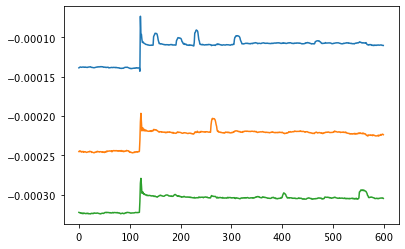

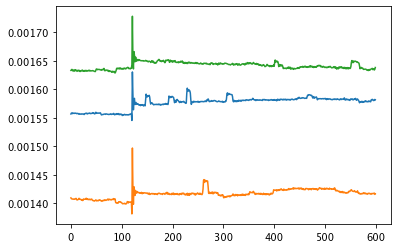

In [20]:
fetch_and_plot_PQ()

In [21]:
def fetch_and_plot_VI(in_records=newrcd, in_indx=0, is_scale=True):
    if is_scale:
        scale_i= SIndx.IA_SCALE
        scale_v = SIndx.VA_SCALE
    else:
        scale_i = SIndx.NO_SCALE
        scale_v = SIndx.NO_SCALE
    ia = get_scaled_vector(in_records, in_indx, channel=Channels.VA, scale_indx=scale_v)
    ib = get_scaled_vector(in_records, in_indx, channel=Channels.VB, scale_indx=scale_v)
    ic = get_scaled_vector(in_records, in_indx, channel=Channels.VC, scale_indx=scale_v)
    plt.plot(ia), plt.plot(ib), plt.plot(ic), plt.show()
    ia = get_scaled_vector(in_records, in_indx, channel=Channels.IA, scale_indx=scale_i)
    ib = get_scaled_vector(in_records, in_indx, channel=Channels.IB, scale_indx=scale_i)
    ic = get_scaled_vector(in_records, in_indx, channel=Channels.IC, scale_indx=scale_i)
    plt.plot(ia), plt.plot(ib), plt.plot(ic), plt.show()

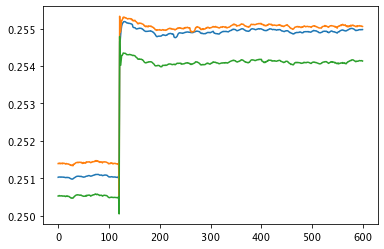

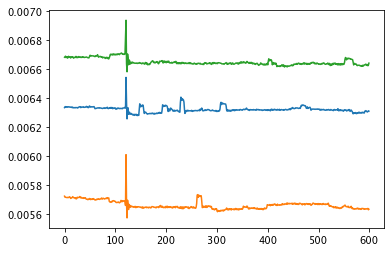

In [22]:
fetch_and_plot_VI()

## Data set up for bulk dataset creation

In [23]:
def get_scaled_vector_bulk(records_in, record_indx, channel, scale_indx):
    arr = np.frombuffer(records_in[record_indx][-1], dtype=np.float32)
    if scale_indx == SIndx.NO_SCALE:
        scale = 1
    elif scale_indx == SIndx.PQ_SCALE:
        scale = scale_look_up[records_in[record_indx][1]][SIndx.IA_SCALE]*\
                scale_look_up[records_in[record_indx][1]][SIndx.VA_SCALE]
    else:
        scale = scale_look_up[records_in[record_indx][1]][scale_indx]
    len = records_in[record_indx][Indx.SECONDS] * records_in[record_indx][Indx.FREQ]
    vect = arr[(len*channel):(len*(channel + 1))]
    
    
    return vect

In [24]:
vect=get_scaled_vector(newrcd,12,Channels.IB,SIndx.IB_SCALE)

In [25]:
vect

array([0.00317213, 0.00317544, 0.00317419, 0.00317264, 0.00317343,
       0.00317743, 0.00317805, 0.00317751, 0.00317594, 0.00317679,
       0.0031807 , 0.00318068, 0.00318093, 0.00318063, 0.00318191,
       0.00318149, 0.00318193, 0.00318417, 0.00318404, 0.00318311,
       0.00317806, 0.00318111, 0.00318203, 0.00318528, 0.00318516,
       0.00318458, 0.0031853 , 0.00318552, 0.00318614, 0.00318719,
       0.00318434, 0.00318657, 0.00318608, 0.00318688, 0.00318675,
       0.00318811, 0.00318526, 0.00318529, 0.00318713, 0.0031879 ,
       0.0031936 , 0.0031935 , 0.00317884, 0.00316626, 0.00316706,
       0.0031677 , 0.00316528, 0.00316527, 0.00316731, 0.00317093,
       0.00316935, 0.00316454, 0.00316393, 0.00316619, 0.00316307,
       0.00315657, 0.00315556, 0.00316155, 0.00315888, 0.00316363,
       0.00316649, 0.00316716, 0.00316722, 0.00316119, 0.00316015,
       0.00316309, 0.00315773, 0.00316444, 0.00316293, 0.00316477,
       0.00316481, 0.00316957, 0.00316515, 0.00316239, 0.00316

In [ ]:
enum classification_codes {

			GENERIC_ARCING 						= 23100, 
			GENERIC_LONG_ARCING					= 23104, 
			GENERIC_SHORT_ARCING 				= 23102,
			CAPACITOR_ON 						= 10110, 
			CAPACITOR_OFF 						= 10120, 
			CAPACITOR_ON_ABNORMAL 				= 20110, 
			CAPACITOR_RESTRIKE 					= 20210,
			CAPACITOR_RESTRIKE_SEVERE			= 20211, 
			CAPACITOR_ON_UNBALANCED				= 20130,
			CAPACITOR_BOUNCE					= 20310, 
			CAPACITOR_OFF_UNBALANCED 			= 20140, 
			CAPACITOR_ON_VAR_IMBALANCE 			= 20510,
			CAPACITOR_OFF_VAR_IMBALANCE			= 20520,
			ARCING_INSIDE_CAPACITOR				= 23180,
			UNKNOWN_ABNORMAL					= 28110,
			CT_PT_SWITCH_CLOSED					= 30200,
			CT_PT_SWITCH_OPENED 				= 30100,
			OC_NORMAL							= 15110,
			OC_CAPACITOR						= 20410,
			OC_LESS_THAN_1_CYC					= 15220,
			REVERSE_FAULT						= 15710,
			INRUSH								= 13170,
			BREAKER_CLOSE						= 13171,
			LOAD_STEP_UP						= 13120,
			LOAD_STEP_DOWN						= 13121,
			MOTOR_START							= 12110,
			SERIES_SWITCH_ARCING				= 23190,
			VOLTAGE_STEP_UP						= 13210,
			VOLTAGE_STEP_DOWN					= 13220,
			LOAD_VARIATION						= 13110,
			VOLTAGE_HF_TRANSIENT				= 13310,
			CURRENT_HF_TRANSIENT				= 23310,

		};


### Pseudo code

In [1]:
a = dict()
a['f1'] = [['va'],['vb'],['vc'],1,2]
a['f2'] = [['va'],['vb'],['vc'],1,3]
a['f3'] = [['va'],['vb'],['vc'],1,4]
a

{'f1': [['va'], ['vb'], ['vc'], 1, 2],
 'f2': [['va'], ['vb'], ['vc'], 1, 3],
 'f3': [['va'], ['vb'], ['vc'], 1, 4]}

In [2]:
a['f1']

[['va'], ['vb'], ['vc'], 1, 2]

In [215]:
new_res = dict()
rms_vecs = []
a = [x for x in range (0,2)]
b = ['VA','VB','VC','IA','IB','IC','VA_PD','VB_PD','VC_PD','IA_PD','IB_PD','IC_PD']#,'IN_PD','PA','PB','PC','QA','QB','QC','VA_SD','VB_SD','VC_SD','IA_SD','IB_SD','IC_SD','IN_SD','VA_EVENS','VB_EVENS','VC_EVENS','IA_EVENS','IB_EVENS','IC_EVENS','IN_EVENS','VA_ODDS','VB_ODDS','VC_ODDS','IA_ODDS','IB_ODDS','IC_ODDS','IN_ODDS']
for i in a:
    rms_vecs = []
    for j in b:
        
        if j == 'VA':
            channel=Channels.VA
            scale_indx = SIndx.VA_SCALE
        elif j == 'VB':
            channel=Channels.VB
            scale_indx = SIndx.VB_SCALE
        elif j == 'VC':
            channel=Channels.VC
            scale_indx = SIndx.VC_SCALE
        elif j == 'IA':
            channel=Channels.IA
            scale_indx = SIndx.IA_SCALE
        elif j == 'IB':
            channel=Channels.IB
            scale_indx = SIndx.IB_SCALE
        elif j == 'VA_PD':
            channel=Channels.VA_PD
            scale_indx = SIndx.VA_SCALE
        elif j == 'VB_PD':
            channel=Channels.VB_PD
            scale_indx = SIndx.VB_SCALE
        elif j == 'VC_PD':
            channel=Channels.VC_PD
            scale_indx = SIndx.VC_SCALE
        elif j == 'IA_PD':
            channel=Channels.IA_PD
            scale_indx = SIndx.IA_SCALE
        elif j == 'IB_PD':
            channel=Channels.IB_PD
            scale_indx = SIndx.IB_SCALE
        elif j == 'IC_PD':
            channel=Channels.IC_PD
            scale_indx = SIndx.IC_SCALE
        else:
            channel=Channels.IC
            scale_indx = SIndx.IC_SCALE
#         print(i,j,channel,scale_indx)
        vect= get_scaled_vector_bulk(records_in = newrcd, record_indx = i, channel=channel, scale_indx = scale_indx)
#         print(vect)
        rms_vecs.append(vect)
    new_res[i] = rms_vecs
        
new_res        

{0: [array([0.2510315 , 0.2510373 , 0.2510379 , 0.25103867, 0.2510377 ,
         0.2510331 , 0.25103942, 0.25103524, 0.2510359 , 0.25103495,
         0.25103554, 0.25103003, 0.2510333 , 0.2510263 , 0.25102314,
         0.25102153, 0.2510271 , 0.2510237 , 0.25102818, 0.25102302,
         0.25102368, 0.25102305, 0.25101635, 0.25100657, 0.25099933,
         0.25099432, 0.2509848 , 0.25098184, 0.25098184, 0.25098655,
         0.25100023, 0.25100943, 0.25101733, 0.25102627, 0.25103888,
         0.25104287, 0.25105268, 0.2510568 , 0.25105837, 0.25105837,
         0.25105992, 0.25105932, 0.25105527, 0.2510515 , 0.25105342,
         0.2510584 , 0.2510497 , 0.25104523, 0.25103992, 0.25103733,
         0.2510335 , 0.25103918, 0.25103825, 0.25104308, 0.25105184,
         0.25105828, 0.2510601 , 0.2510649 , 0.25106418, 0.25107366,
         0.25107422, 0.25107634, 0.25107145, 0.25106755, 0.25106004,
         0.25106242, 0.25106657, 0.25107303, 0.25107744, 0.25108215,
         0.25108778, 0.2510923 

In [178]:
#### capacitor on data
va = new_res[1][0]
vb = new_res[1][1]
vc = new_res[1][2]
ia = new_res[1][3]
ib = new_res[1][4]
ic = new_res[1][5]
va_pd = new_res[1][6]
vb_pd = new_res[1][7]
vc_pd = new_res[1][8]
ia_pd = new_res[1][9]
ib_pd = new_res[1][10]
ic_pd = new_res[1][11]

In [176]:
rgb_uint8 = (np.vstack((va,vb,vc,ia,ib,ic,va_pd,vb_pd,vc_pd,ia_pd,ib_pd,ic_pd))*255).astype(np.uint8)

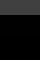

In [189]:
rgb_uint8 = (np.c_[va,vb,vc,ia,ib,ic,va_pd,vb_pd,vc_pd,ia_pd,ib_pd,ic_pd].T *255).astype(np.uint8)
mat = np.reshape(rgb_uint8,(60,40,3))
img = Image.fromarray((mat) ,mode='RGB')
img.save('test_new1.png')
img 


# mat = np.reshape(rgb_uint8,(60,40,3))
# img = Image.fromarray((mat) ,mode='RGB')
# img.save('test_new1.png')
# img

In [190]:
rgb_uint8

array([[63, 63, 63, ..., 64, 64, 64],
       [63, 63, 63, ..., 64, 64, 64],
       [63, 63, 63, ..., 64, 64, 64],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

In [195]:
img2 = Image.open('capon3.png')
arr = np.asarray(img2)
print(arr)

[[[ 53  86   6]
  [ 47  86   3]
  [ 50  82   2]
  ...
  [ 53  77   1]
  [ 42  89   2]
  [ 51  82   5]]

 [[ 50  71   4]
  [ 50  81   6]
  [ 45  86   2]
  ...
  [ 60  74   4]
  [ 60  77   0]
  [ 51  84   1]]

 [[ 53  82   4]
  [ 51  71   3]
  [ 50  81   3]
  ...
  [ 51  77   6]
  [ 56  76   9]
  [ 53  82   6]]

 ...

 [[217 224 100]
  [207 237 100]
  [211 220 106]
  ...
  [207 220 104]
  [207 219 106]
  [212 220  99]]

 [[216 220 102]
  [212 222  98]
  [209 229  97]
  ...
  [206 230  98]
  [211 217 104]
  [209 227 101]]

 [[207 222  97]
  [217 216 100]
  [214 217  94]
  ...
  [201 229  96]
  [214 230  96]
  [207 219 103]]]


In [171]:
# !pip install tensorflow

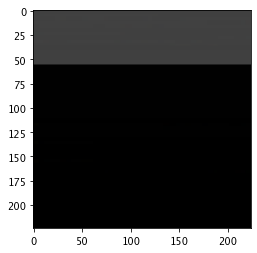

In [172]:
from keras.preprocessing import image
from PIL import Image as pil_image
img = image.load_img("test_new1.png",target_size=(224,224,3))
img = np.asarray(img)
plt.imshow(img)

## vector operation(Final)

In [4]:
import numpy as np
# x = np.zeros(12)
a=np.array([1,2,3,4,5,6,7,8,9,10,11,12])#.reshape(1,1,11)
# a = np.pad(a,(0,6))
b=np.array([11,22,33,44,55,66,77,88,99,110,111,112])#.reshape(1,1,11)
# b = np.pad(b,(0,6))
c=np.array([111,222,333,444,555,666,777,888,999,1000,1111,1112])#.reshape(1,1,11)
# c = np.pad(c,(0,6))
# d = np.zeros(33).reshape(1,3,11)



In [131]:
c

array([ 111,  222,  333,  444,  555,  666,  777,  888,  999, 1000, 1111,
       1112])

In [6]:
a4 = np.hsplit(a,3)
a4 = np.array(a4)
a5 = np.hsplit(b,3)
a5 = np.array(a5)
a6 = np.hsplit(c,3)
a6 = np.array(a6)
print(a4)
print(a5)
print(a6)


[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[[ 11  22  33  44]
 [ 55  66  77  88]
 [ 99 110 111 112]]
[[ 111  222  333  444]
 [ 555  666  777  888]
 [ 999 1000 1111 1112]]


In [9]:
out_arr1 = np.stack((a4, a5,a6), axis=1)
print(out_arr1)
print(out_arr1.shape)

[[   1    2    3    4    5    6    7    8    9   10   11   12]
 [  11   22   33   44   55   66   77   88   99  110  111  112]
 [ 111  222  333  444  555  666  777  888  999 1000 1111 1112]]
(3, 12)


In [134]:

layer1 = np.stack((a4, a5,a6), axis=1).reshape(9,4)
layer2 = 2*layer1
layer3 = 3*layer1

In [135]:

layer4 = np.stack((a6, a5,a4), axis=1).reshape(9,4)
layer5 = 2*layer4
layer6 = 3*layer4

In [136]:

layer7 = np.stack((a5, a4,a6), axis=1).reshape(9,4)
layer8 = 2*layer7
layer9 = 3*layer7

In [142]:
layer10 = np.stack((a5,a6),axis = 1).reshape(6,4)
layer11 = np.zeros(8).reshape(2,4)

In [3]:
layer10

NameError: name 'layer10' is not defined

In [155]:
ch1 = np.stack((layer1,layer4,layer7)).reshape(27,4)# 224 row will not be 224
ch1 = np.concatenate((ch1,layer10))
ch1 = np.concatenate((ch1,layer11))
ch2 = np.stack((layer2,layer5,layer8)).reshape(27,4)
ch2 = np.concatenate((ch2,layer10))
ch2 = np.concatenate((ch2,layer11))
ch3 = np.stack((layer3,layer6,layer9)).reshape(27,4)
ch3 = np.concatenate((ch3,layer10))
ch3 = np.concatenate((ch3,layer11))
# ch4 = np.concatenate((layer10,layer11), axis= 0)

In [157]:
# ch1
np.array(ch3, dtype=np.uint)

array([[   3,    6,    9,   12],
       [  33,   66,   99,  132],
       [ 333,  666,  999, 1332],
       [  15,   18,   21,   24],
       [ 165,  198,  231,  264],
       [1665, 1998, 2331, 2664],
       [  27,   30,   33,   36],
       [ 297,  330,  333,  336],
       [2997, 3000, 3333, 3336],
       [ 333,  666,  999, 1332],
       [  33,   66,   99,  132],
       [   3,    6,    9,   12],
       [1665, 1998, 2331, 2664],
       [ 165,  198,  231,  264],
       [  15,   18,   21,   24],
       [2997, 3000, 3333, 3336],
       [ 297,  330,  333,  336],
       [  27,   30,   33,   36],
       [  33,   66,   99,  132],
       [   3,    6,    9,   12],
       [ 333,  666,  999, 1332],
       [ 165,  198,  231,  264],
       [  15,   18,   21,   24],
       [1665, 1998, 2331, 2664],
       [ 297,  330,  333,  336],
       [  27,   30,   33,   36],
       [2997, 3000, 3333, 3336],
       [  11,   22,   33,   44],
       [ 111,  222,  333,  444],
       [  55,   66,   77,   88],
       [ 5

In [164]:
g = np.stack((ch1,ch2,ch3))
print(g.shape)
main = np.array(g, dtype=np.uint)
mat = np.reshape(main,(4,35,3))
img = Image.fromarray((mat) ,mode='RGB')
# img.save('test_img_toy.png')
img 

(3, 35, 4)


In [163]:
from keras.preprocessing import image
from PIL import Image #as pil_image

In [166]:
main

array([[[   1,    2,    3,    4],
        [  11,   22,   33,   44],
        [ 111,  222,  333,  444],
        [   5,    6,    7,    8],
        [  55,   66,   77,   88],
        [ 555,  666,  777,  888],
        [   9,   10,   11,   12],
        [  99,  110,  111,  112],
        [ 999, 1000, 1111, 1112],
        [ 111,  222,  333,  444],
        [  11,   22,   33,   44],
        [   1,    2,    3,    4],
        [ 555,  666,  777,  888],
        [  55,   66,   77,   88],
        [   5,    6,    7,    8],
        [ 999, 1000, 1111, 1112],
        [  99,  110,  111,  112],
        [   9,   10,   11,   12],
        [  11,   22,   33,   44],
        [   1,    2,    3,    4],
        [ 111,  222,  333,  444],
        [  55,   66,   77,   88],
        [   5,    6,    7,    8],
        [ 555,  666,  777,  888],
        [  99,  110,  111,  112],
        [   9,   10,   11,   12],
        [ 999, 1000, 1111, 1112],
        [  11,   22,   33,   44],
        [ 111,  222,  333,  444],
        [  55,

## image creation with pre filled 0s

In [160]:
from PIL import Image as pil_image
# placeholder for images 
images = np.zeros(shape=(1,8,8,3))

# Model requires the input shape to be (224,224,3)    

x_raw = np.vstack((a,b,c))
x_raw = x_raw.reshape((11,3))
# overwrite first instance of images placeholder with the image array
x_expand = np.expand_dims(x_raw, axis=0)
images[0, :,:] = x_expand

ValueError: could not broadcast input array from shape (1,11,3) into shape (8,8,3)

In [223]:
600%224

152

In [99]:
224*3

672

In [205]:
x = (np.dstack((a,b,c) * 1))
np.max(x)

1111

In [104]:
y = np.expand_dims(x, axis = 0) 
y.shape

(1, 2, 2)

In [87]:
x_raw

array([[   1,    2,    3],
       [   4,    5,    6],
       [   7,    8,    9],
       [  10,   11,   11],
       [  22,   33,   44],
       [  55,   66,   77],
       [  88,   99,  110],
       [ 111,  111,  222],
       [ 333,  444,  555],
       [ 666,  777,  888],
       [ 999, 1000, 1111]])

In [91]:
x1_raw = np.pad(x_raw,(0,3))

In [49]:
images


array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [145]:
np.pad(a,(0,4-2))

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  0,  0])

In [225]:
a = a[:5]
a

array([1, 2, 3, 4, 5])

In [ ]:
rr2_append = numpy.append (arr1_append, [12, 13, 14])

In [182]:
# a1 = np.c_[a,b,c]
# a1

In [220]:
a2 = np.c_[a,b,c].T
print(np.max(a2))
print(a2)
print(a2.reshape(11,3))

1111
[[   1    2    3    4    5    6    7    8    9   10   11]
 [  11   22   33   44   55   66   77   88   99  110  111]
 [ 111  222  333  444  555  666  777  888  999 1000 1111]]
[[   1    2    3]
 [   4    5    6]
 [   7    8    9]
 [  10   11   11]
 [  22   33   44]
 [  55   66   77]
 [  88   99  110]
 [ 111  111  222]
 [ 333  444  555]
 [ 666  777  888]
 [ 999 1000 1111]]


In [155]:
if (len(a)>len(b) & len(a>len(c))):
    b = np.pad(b,(0, len(a)-len(b)))
    c = np.pad(c,(0, len(a)-len(c)))
elif (len(b)>len(c)):
    c = np.pad(c,(0,len(b)-len(c)))
    a = np.pad(a,(0,len(b)-len(a)))
else:
    a = np.pad(a,(0,len(c)-len(a)))
    b = np.pad(b,(0,len(c)-len(b)))
    
a3 = np.vstack((a,b,c)).reshape(12,3)
a3
# print(a)
# print(b)
# print(c)

array([[   1,    2,    3],
       [   4,    5,    6],
       [   7,    8,    9],
       [  10,   11,   12],
       [  11,   22,   33],
       [  44,   55,   66],
       [  77,   88,   99],
       [ 110,  111,    0],
       [ 111,  222,  333],
       [ 444,  555,  666],
       [ 777,  888,  999],
       [1000, 1111,    0]])

In [186]:
# a3.shape

In [222]:
a4 = np.hsplit(a,3)
a5 = np.hsplit(b,3)
a6 = np.hsplit(c,3)
print(a4)
print(a5)
print(a6)

[array([1, 2, 3, 4, 5]), array([ 6,  7,  8,  9, 10]), array([11,  0,  0,  0,  0])]
[array([11, 22, 33, 44, 55]), array([ 66,  77,  88,  99, 110]), array([111,   0,   0,   0,   0])]
[array([111, 222, 333, 444, 555]), array([ 666,  777,  888,  999, 1000]), array([1111,    0,    0,    0,    0])]


In [223]:
out_arr = np.stack((a4, a5,a6), axis = 1)
out_arr

array([[[   1,    2,    3,    4,    5],
        [  11,   22,   33,   44,   55],
        [ 111,  222,  333,  444,  555]],

       [[   6,    7,    8,    9,   10],
        [  66,   77,   88,   99,  110],
        [ 666,  777,  888,  999, 1000]],

       [[  11,    0,    0,    0,    0],
        [ 111,    0,    0,    0,    0],
        [1111,    0,    0,    0,    0]]])

In [140]:
out_arr.shape

(3, 3, 2)

In [144]:
out_arr.reshape(9,2)


array([[  1,   2],
       [ 11,  22],
       [111, 222],
       [  3,   4],
       [ 33,  44],
       [333, 444],
       [  5,   6],
       [ 55,  66],
       [555, 666]])

In [ ]:
import numpy as np
x = np.zeros(12)
a=np.array([1,2,3,4,5,6,7,8,9,10,11])
b=np.array([11,22,33,44,55,66,77,88,99,110,111,np.zeros(4)])
c=np.array([111,222,333,444,555,666,777,888,999,1000,1111,np.zeros(4)])